In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Reading the CSV file
file_path = './data.csv'  # File path
data = pd.read_csv(file_path)

In [3]:
# Checking for missing values
print(data.isna().sum().any())  # Returns True if there are any missing values in the dataset

False


In [4]:
# Checking for duplicate rows
print(data.duplicated().sum())  # Counts the number of duplicate rows in the dataset

0


In [5]:
# Target column
target_column = 'Adj Close'

# Selecting all numerical columns (excluding the date column)
X = data.drop(columns=['Adj Close', 'Date', 'Open', 'Close', 'Low', 'High']) 
y = data[target_column]  # Assign the target variable

In [6]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Reshape data to 3D for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

C:\Users\gulse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Compile the model
model.compile(optimizer='adam', loss='mse')
print("modelll")
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

modelll
Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 16374.8027 - val_loss: 15381.7119
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 12779.5820 - val_loss: 1065.1984
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 897.7379 - val_loss: 406.8929
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 701.4986 - val_loss: 323.4279
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 639.0826 - val_loss: 228.4718
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 545.9166 - val_loss: 150.5421
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 418.6119 - val_loss: 111.2091
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 387.3409 - val_loss: 89.4836
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 359.5131 - val_loss: 80.6834
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 336.0514 - val_loss: 71.1877
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 332.8629 - val_loss: 76.0173
Epoch 12/50
43

In [11]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")

Test Loss: 113.11753845214844


In [12]:
# Make predictions
predictions = model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")

# Make predictions
predictions = model.predict(X_test)

# Flatten predictions if necessary
predictions = predictions.flatten()  # Convert predictions to 1D array

# Ensure y_test is a numpy array
y_test = np.array(y_test)

# Calculate MSE, RMSE, MAE, and R² Score
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the errors
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Optional: Print some predictions and actual values for comparison
for i in range(min(10, len(y_test))):  # Limit to first 10 samples
    print(f"Predicted: {predictions[i]:.4f}, Actual: {y_test[i]:.4f}")


Test Loss: 113.11753845214844
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean Squared Error (MSE): 113.1175
Root Mean Squared Error (RMSE): 10.6357
Mean Absolute Error (MAE): 9.7617
R² Score: 0.6371
Predicted: 123.0175, Actual: 127.7000
Predicted: 105.3023, Actual: 116.4700
Predicted: 144.9464, Actual: 157.3200
Predicted: 140.8440, Actual: 155.0900
Predicted: 120.1034, Actual: 131.0700
Predicted: 108.3165, Actual: 115.0500
Predicted: 107.4595, Actual: 127.4900
Predicted: 151.8162, Actual: 165.1600
Predicted: 103.9936, Actual: 119.5100
Predicted: 94.8553, Actual: 107.8400


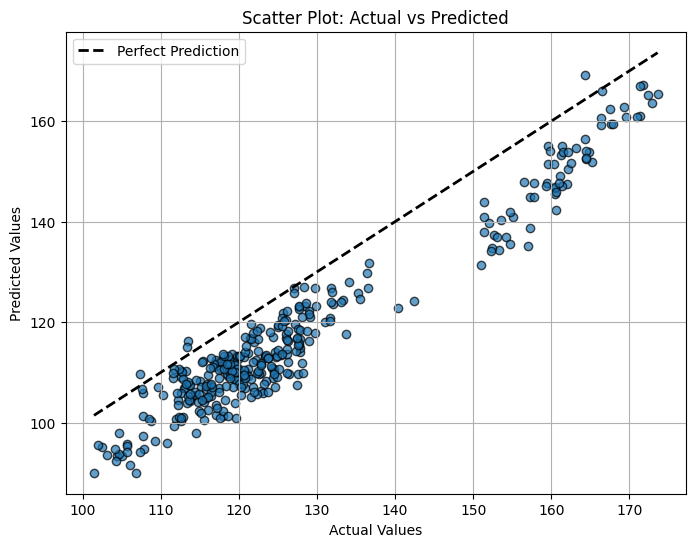

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7, edgecolor='k')  # Scatter plot for actual vs predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.title("Scatter Plot: Actual vs Predicted")  # Plot title
plt.xlabel("Actual Values")  # X-axis label
plt.ylabel("Predicted Values")  # Y-axis label
plt.legend()  # Add legend
plt.grid(True)  # Enable grid for better readability
plt.show()   

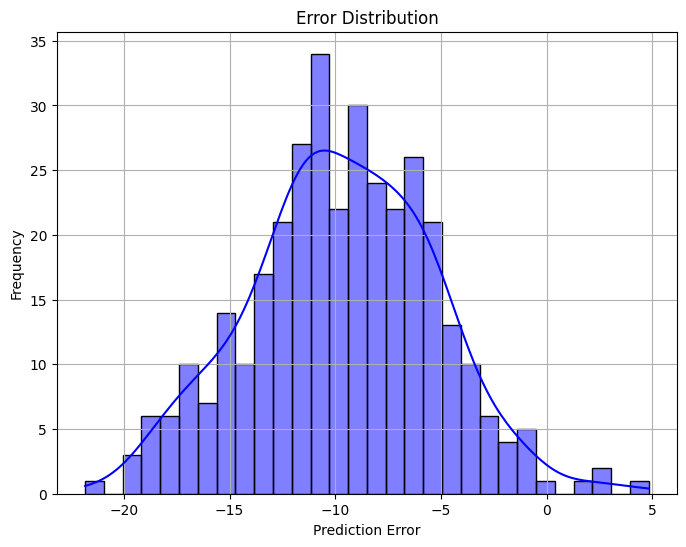

In [15]:
# Error Distribution
errors = predictions - y_test  # Calculate prediction errors
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True, color='blue', edgecolor='black')  # Plot error distribution with histogram
plt.title("Error Distribution")  # Plot title
plt.xlabel("Prediction Error")  # X-axis label
plt.ylabel("Frequency")  # Y-axis label
plt.grid(True)  # Enable grid for better readability
plt.show()

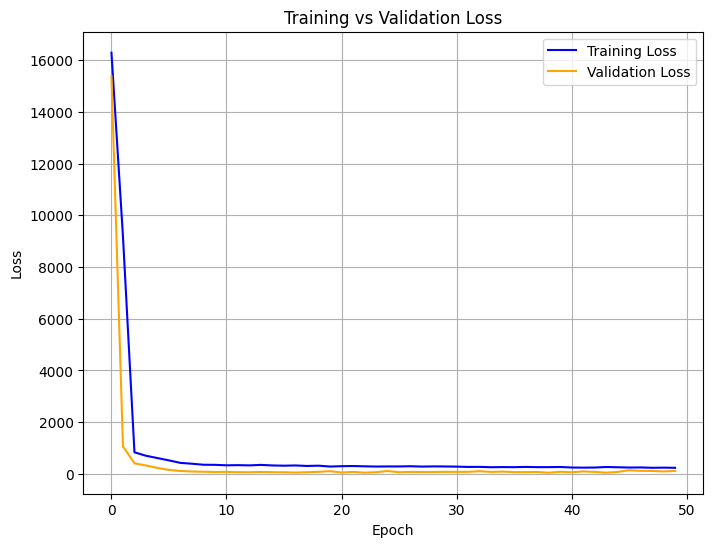

In [16]:
# Training vs Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')  # Plot validation loss
plt.title("Training vs Validation Loss")  # Plot title
plt.xlabel("Epoch")  # X-axis label
plt.ylabel("Loss")  # Y-axis label
plt.legend()  # Add legend
plt.grid(True)  # Enable grid for better readability
plt.show()

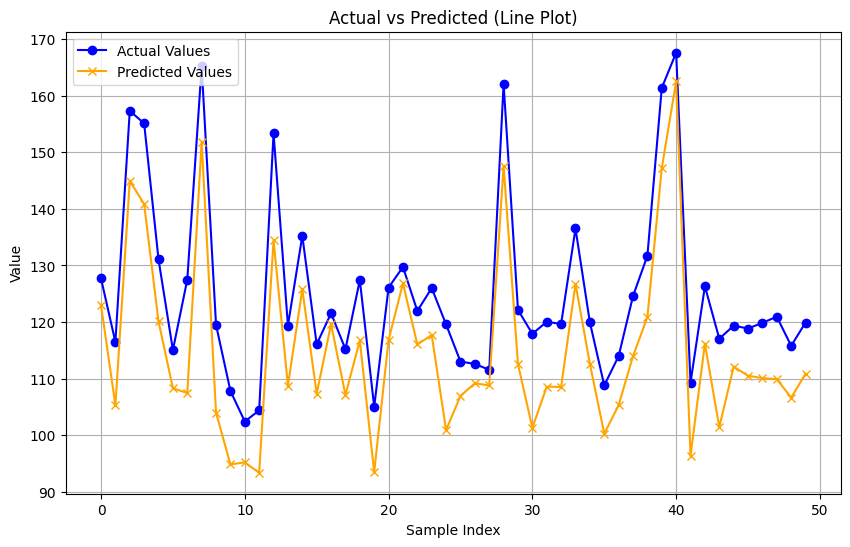

In [17]:
# Actual vs Predicted Line Plot
plt.figure(figsize=(10, 6))
plt.plot(y_test[:50], label='Actual Values', color='blue', marker='o')  # Plot actual values for first 50 samples
plt.plot(predictions[:50], label='Predicted Values', color='orange', marker='x')  # Plot predicted values for first 50 samples
plt.title("Actual vs Predicted (Line Plot)")  # Plot title
plt.xlabel("Sample Index")  # X-axis label
plt.ylabel("Value")  # Y-axis label
plt.legend()  # Add legend
plt.grid(True)  # Enable grid for better readability
plt.show()